In [2]:
import numpy as np
import pandas as pd

keys = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label.']

kdd_df = pd.read_csv('/Users/sawyer/Downloads/assignment_3/kddcup.csv', names=keys)
test = pd.read_csv('/Users/sawyer/Downloads/assignment_3/corrected.csv', names=keys)
kdd_df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label.
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [3]:
import sklearn.ensemble
import sklearn.preprocessing

def preprocess_df(df):
    keys = list(df)
    X = df[keys[:-1]]
    y = df[keys[-1]]
    # nominal string features
    one_hot_features = [1, 2, 3]
    one_hot_columns = [keys[i] for i in one_hot_features]
    
    preprocessed_X = pd.get_dummies(X, dummy_na=False, columns=one_hot_columns)
    # binary classifier (1 for malicious)
    bin_y = [0 if v == 'normal.' else 1 for v in y]
    return preprocessed_X, bin_y
X, y = preprocess_df(kdd_df)
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,215,45076,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,162,4528,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,236,1228,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,233,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,212,2288,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4898427,0,219,236,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4898428,0,218,3610,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4898429,0,219,1234,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X_test, y_test = preprocess_df(test)

for key in set(X):
    if key not in X:
        X[key] = 0

X_test = X_test.reindex(columns=X.columns, fill_value=0)

X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,105,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
311025,0,105,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
311026,0,105,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
311027,0,105,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
model = sklearn.ensemble.RandomForestClassifier(class_weight={0:5, 1:1})
model.fit(X, y)

RandomForestClassifier(class_weight={0: 5, 1: 1})

In [39]:
y_softmax = model.predict_proba(X_test)

threshold = 0.00000001
y_hat = [1 if y >= threshold else 0 for _, y in y_softmax]
print(y_softmax)
print(sum([1 for _, y in y_softmax if y >= threshold]))
print(len(y_softmax))

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]]
241012
311029


In [43]:
n_correct = sum([1 if y_test[i] == y_hat[i] else 0 for i in range(len(y_test))])

accuracy_matrix = np.zeros((2,2))
for i in range(len(y_test)):
    accuracy_matrix[y_test[i]][y_hat[i]] += 1

accuracy = (accuracy_matrix[0][0] + accuracy_matrix[1][1]) / len(y_test)
precision = accuracy_matrix[1][1] / (accuracy_matrix[0][1] + accuracy_matrix[1][1])
recall = accuracy_matrix[1][1] / (accuracy_matrix[1][0] + accuracy_matrix[1][1])
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

print("Confusion Matrix")
print('actual 0: ', list(map(lambda x:x/len(y_test), accuracy_matrix[0])))
print('actual 1: ', list(map(lambda x:x/len(y_test), accuracy_matrix[1])))
    

Accuracy:  0.9515800777419469
Precision:  0.9883076361343004
Recall:  0.9511172515133607
Confusion Matrix
actual 0:  [0.18575438303180733, 0.009060248401274479]
actual 1:  [0.039359673856778625, 0.7658256947101396]


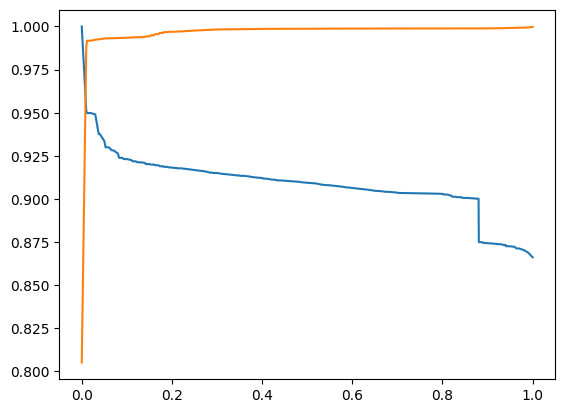

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, [y for _, y in y_softmax])
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, precision[:-1], label="Precision")